# Knapsack Problem

## 1. Problem definition
Knapsack problem is defined as 
$$\begin{aligned}
\max \quad & \langle c, x\rangle\\
 \text{s.t.} \quad & \langle 1, x\rangle =b\\
 \quad & x\in [0, \overline x]
\end{aligned}$$
Without loss of generality, we assume that $c$ is sorted, i.e. $c_1\geq c_2 \geq ....\geq c_n>0$. The solution of this problem has a closed form solution.
Let $k$ be the largest index so that 
$$\gamma_k := \sum_{i=1, k} \overline x_i \leq b$$
Then the optimal solution $x^\star$ is 
$$\begin{aligned}
x^\star_i = \begin{cases}
	\overline x_i & \text{ if } i\leq k\\
	b - \gamma & \text{ if } i= k+1\\
	0 & \text{ otherwise}
\end{cases}
\end{aligned}$$

## 2. Experiment

In [61]:
import numpy as np 
np.random.seed(123)

n = 10
c = - np.sort(-np.random.rand(n)) # cost coefficients with decreasing order
xbar = np.random.rand(n) # bounds of x
lbd = 0.61 # parameter of b
b = lbd * xbar.sum() # budget

def knapsack(c, xbar, b):
	# c is sorted in decreasing order 
	# b <= sum(xbar)
	xopt = np.zeros_like(xbar) 
	gamma = 0 
	for i in range(n):
		gamma += xbar[i] 
		xopt[i] = xbar[i]
		if gamma >b:
			gamma -= xbar[i] 
			xopt[i] = b - gamma
			break
	return xopt
    
xopt = knapsack(c, xbar, b)
print("opt solution is", xopt)
print("check sum(xopt) = b, result is", np.abs(xopt.sum() - b)<1e-6)

opt solution is [0.34317802 0.72904971 0.43857224 0.0596779  0.39804426 0.54946026
 0.         0.         0.         0.        ]
check sum(xopt) = b, result is True


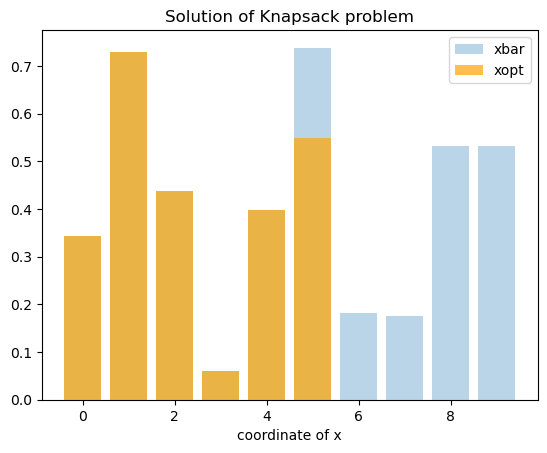

In [62]:
# visualization 
import matplotlib.pyplot as plt 
plt.bar(range(n), xbar, alpha=0.3, label="xbar")
plt.bar(range(n), xopt, alpha=0.7, color="orange", label="xopt")
plt.legend()
plt.xlabel("coordinate of x")
plt.title("Solution of Knapsack problem")
plt.show()

## 2. Parameterized Knapsack 

Let $\overline b = \sum_{i=1,n} \overline x$. It is clear that the Knapsack problem is feasible iff $b\in [0, \overline b]$.
Let $f(b)$ be the maximum value of above Knapsack problem parameterized by $b$. Then we have the following theorem characterize the function $f$


**Theorem.** $f$ is a piecewise linear increasing concave function for $b \in [0, \overline b]$.

Moreover, the breakpoint of $f$ is $\gamma_k$ defined above. On $[\gamma_{k-1}, \gamma_{k}]$, the slope of $f$ is $c_k$.
Which forms a decreasing sequence, thus $f$ is concave.
The following code aims to demonstrate the function $f$.

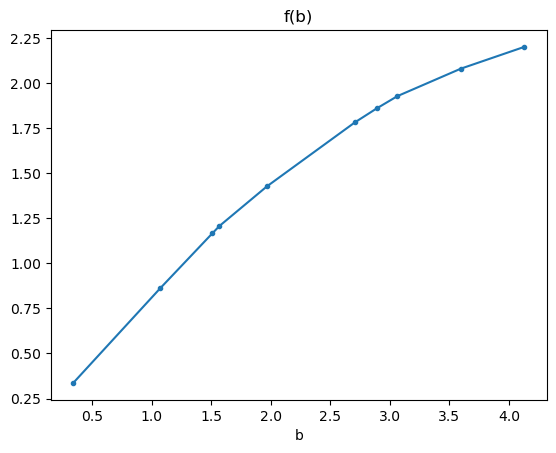

In [60]:
gamma_values = []
S = 0
for i in range(n):
    S += xbar[i]
    gamma_values += [S] 

def max_knapsack(c, xbar, b):
    xopt = knapsack(c, xbar, b)
    max_value = np.dot(c, xopt) 
    return max_value 

f_values = [max_knapsack(c, xbar, b) for b in gamma_values]

plt.plot(gamma_values, f_values, marker=".")
plt.title("f(b)")
plt.xlabel("b")
plt.show()